In [60]:
import spot
import spot.ltsmin
from IPython.display import (
    display_pretty, display_html, display_jpeg,
    display_png, display_json, display_latex, display_svg
)
spot.ltsmin.require('divine')
spot.setup(max_states=10)

In [61]:
%%dve n


process Feu1 {
  state vert, rouge;
  init vert;
  trans
    vert -> rouge {},
    rouge -> vert {guard Feu2.vert == 0;};
}

process Feu2 {
  state vert, rouge;
  init rouge;
  trans
    vert -> rouge {},
    rouge -> vert {guard Feu1.vert == 0;};
}

system async;

In [62]:
n

ltsmin model with the following variables:
  Feu1: ['vert', 'rouge']
  Feu2: ['vert', 'rouge']

In [63]:
f = spot.formula('[]!("Feu1.vert"&&"Feu2.vert")')

In [64]:
f

G!("Feu1.vert" & "Feu2.vert")

In [65]:
ss = n.kripke(spot.atomic_prop_collect(f))

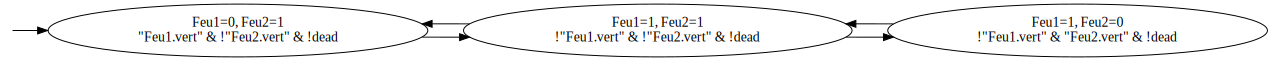

In [66]:
ss

In [67]:
f2 = spot.translate(f)

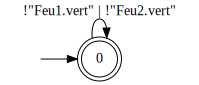

In [68]:
f2

In [69]:
nf = spot.formula_Not(f).translate()

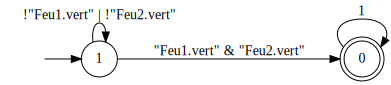

In [70]:
nf

In [71]:
prod = spot.otf_product(ss, nf)

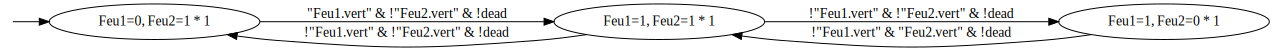

In [72]:
prod

In [73]:
prod.is_empty()

True

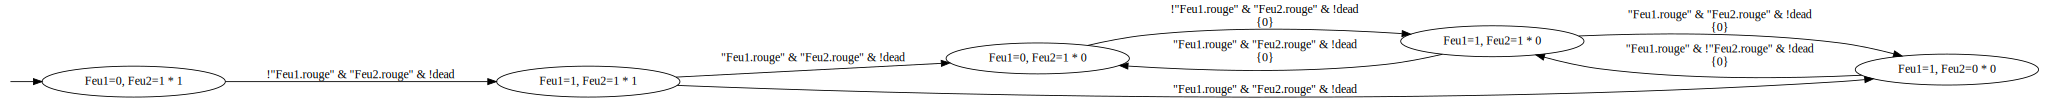

In [75]:
# state-acceptance Buchi:
f2 = spot.formula('[]!("Feu1.rouge"&&"Feu2.rouge")')
nf2 = spot.formula_Not(f2).translate()
ss2 = n.kripke(spot.atomic_prop_collect(f2))
prod2 = spot.otf_product(ss2, nf2)
prod2

In [76]:
prod2.is_empty()

False

In [77]:
run = spot.couvreur99(prod2).check().accepting_run(); 
run

Prefix:
  Feu1=0, Feu2=1 * 1
  |  !"Feu1.rouge" & "Feu2.rouge" & !dead
  Feu1=1, Feu2=1 * 1
  |  "Feu1.rouge" & "Feu2.rouge" & !dead
Cycle:
  Feu1=0, Feu2=1 * 0
  |  !"Feu1.rouge" & "Feu2.rouge" & !dead	{0}
  Feu1=1, Feu2=1 * 0
  |  "Feu1.rouge" & "Feu2.rouge" & !dead	{0}